 Analyze Times series:
 
 Plot time series (give visual feedback)

a) https://www.kaggle.com/datasets/ashfakyeafi/air-passenger-data-for-time-series-analysis

In [29]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pa
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
df_air = pa.read_csv(r"C:\Users\krent\OneDrive\Desktop\PythonII\PythonIIPractical\week5\AirPassengers.csv")

In [31]:
df_air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [32]:
df_air = df_air.rename(columns={"#Passengers":"Passengers"})

<Axes: >

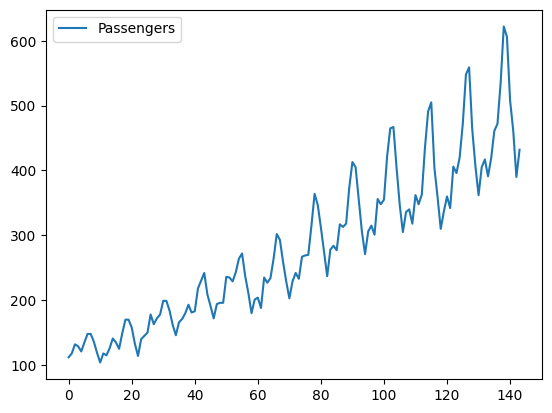

In [33]:
df_air.plot()

Caculate and plot ACF (give visual feedback)

<StemContainer object of 3 artists>

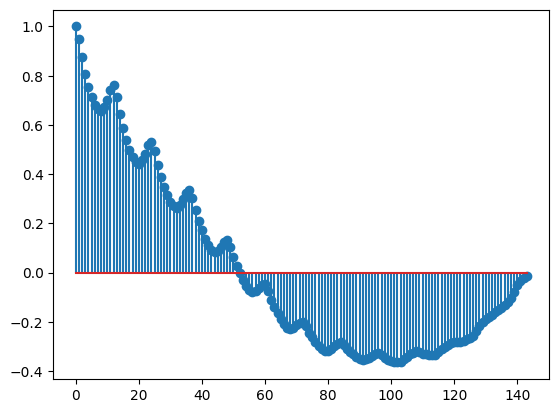

In [34]:
data = df_air["Passengers"]
acf = sm.tsa.stattools.acf(data,nlags=150)
plot.stem(range(0,len(acf)),acf)

 Check, if the time series is stationary (using Augmented Dickey-Fuller (ADF) test)
 If there is the trend - remove it from the Time Series

In [35]:
test_results = adfuller(data)
print('ADF Statistic: ', test_results[0])
print('P-Value: ', test_results[1])

ADF Statistic:  0.8153688792060457
P-Value:  0.991880243437641


In [36]:
#P-value is greater than .05 - H0 hypoteses cannot be declined. This means the time series is non-stationary.

<Axes: >

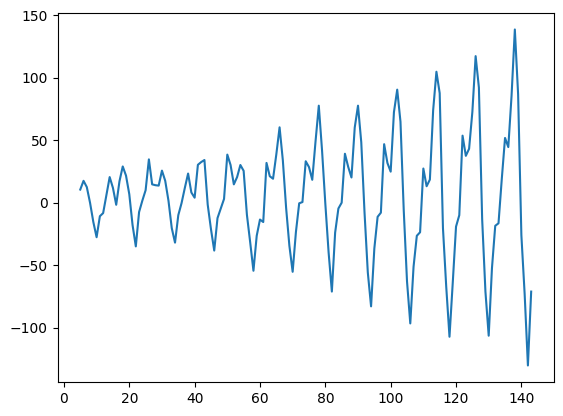

In [37]:
#Removing trend from time series. Substract rolling 6 months average from the data.
rolling_mean = data.rolling(window=6).mean()
data_no_trend = data - rolling_mean#remove trend
data_no_trend.plot()

 Check seasonality (visually and using ACF)

<StemContainer object of 3 artists>

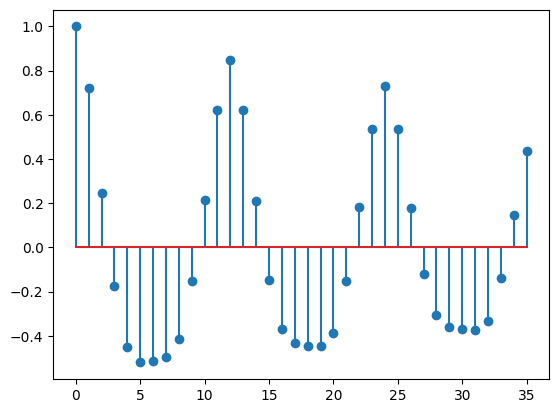

In [38]:
data_no_trend = data_no_trend[data_no_trend.notnull()]
acf = sm.tsa.stattools.acf(data_no_trend,nlags=35)
plot.stem(range(0,len(acf)),acf)

<Axes: >

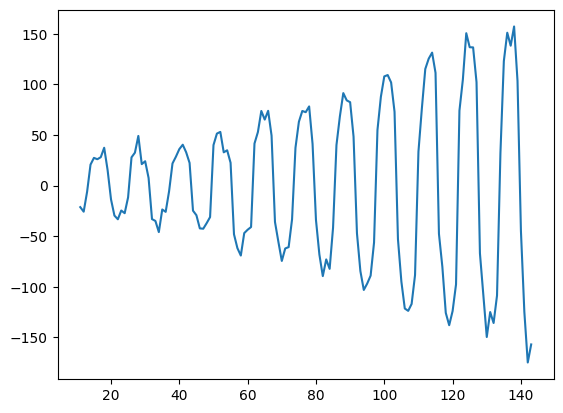

In [39]:
#Remove sesonality.
data_cleared = data_no_trend.diff(periods=6)
data_cleared = data_cleared[data_cleared.notnull()]
data_cleared.plot()

<StemContainer object of 3 artists>

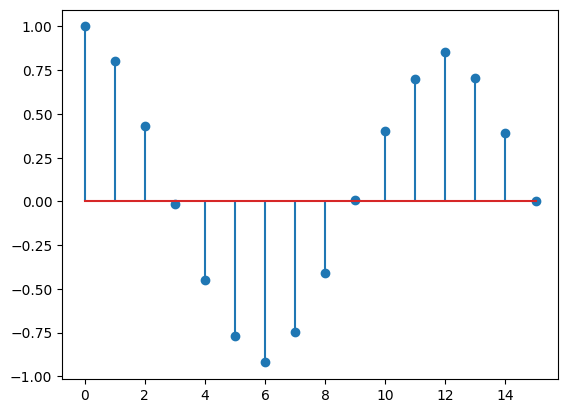

In [40]:
acf = sm.tsa.stattools.acf(data_cleared,nlags=15)
plot.stem(range(0,len(acf)),acf)

Run automatic ARIMA model determination.

Find the best model, give summary and display the results (existing time range + future)

In [41]:
model = auto_arima(data_cleared,trace=True)
results = model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1197.907, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1540.196, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1396.848, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1538.203, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1198.982, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1366.188, Time=0.04 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1196.078, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(

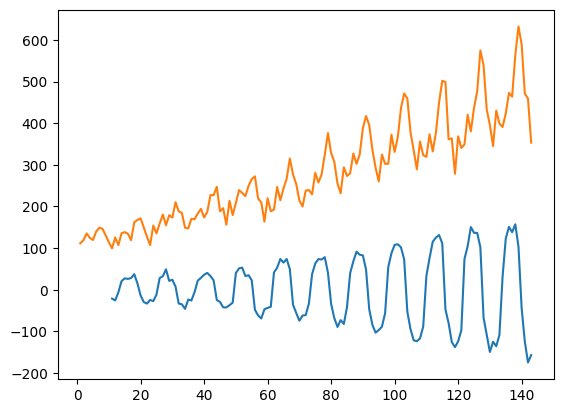

In [42]:
#ARIMA 2,2
plot.plot(data_cleared)
fitted_vals = results.fittedvalues()
fitted_vals = fitted_vals[1:]
plot.plot(fitted_vals)

In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -700.567
Date:                Sun, 23 Jul 2023   AIC                           1411.135
Time:                        20:56:47   BIC                           1425.984
Sample:                             0   HQIC                          1417.168
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3127      0.201      1.556      0.120      -0.081       0.706
ar.L2          0.6727      0.196      3.439      0.001       0.289       1.056
ma.L1          1.1079      0.221      5.014      0.000       0.675       1.541
ma.L2          0.1871      0.159      1.180      0.238      -0.124       0.498
sigma2       949.2267    106.595      8.905      0.000     740.303    1158.150
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.98   Prob(JB):                         0.41
Heteroskedasticity (H):               7.26   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
model = auto_arima(data,trace=True,suppress_warnings=True)
results = model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

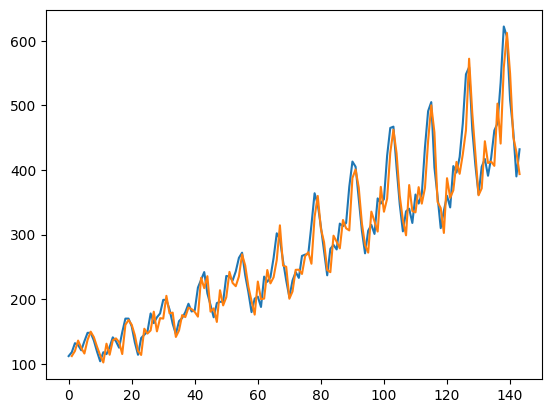

In [45]:
plot.plot(data)
fitted_vals = results.fittedvalues()
fitted_vals = fitted_vals[1:]
plot.plot(fitted_vals)

b)Select your own data:

Plot time series (give visual feedback)

In [49]:
df_shampoo = pa.read_csv(r"C:\Users\krent\OneDrive\Desktop\PythonII\PythonIIPractical\week5\sales-of-shampoo-over-a-three-ye.csv")

In [50]:
df_shampoo

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3
5,1-Jun,168.5
6,1-Jul,231.8
7,1-Aug,224.5
8,1-Sep,192.8
9,1-Oct,122.9


In [51]:
df_shampoo = df_shampoo.rename(columns={"Sales of shampoo over a three year period":"Sales"})

<Axes: >

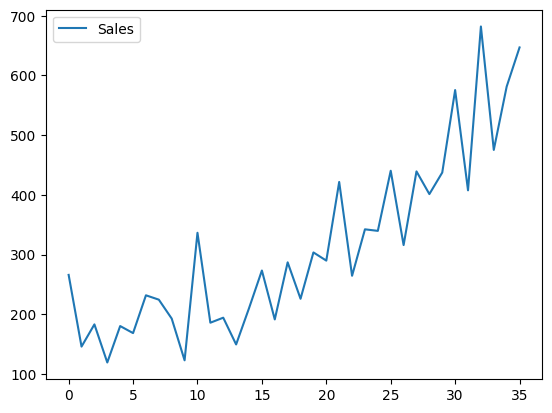

In [56]:
df_shampoo.plot()

Caculate and plot ACF (give visual feedback)

<StemContainer object of 3 artists>

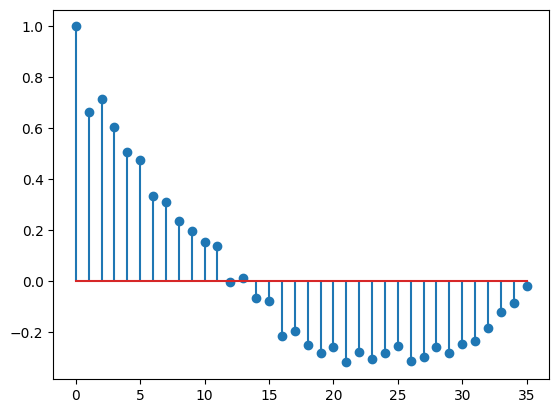

In [62]:
data = df_shampoo["Sales"]
acf = sm.tsa.stattools.acf(data,nlags=150)
plot.stem(range(0,len(acf)),acf)

Check, if the time series is stationary (using Augmented Dickey-Fuller (ADF) test) If there is the trend - remove it from the Time Series

In [63]:
test_results = adfuller(data)
print('ADF Statistic: ', test_results[0])
print('P-Value: ', test_results[1])

ADF Statistic:  3.0601420836411792
P-Value:  1.0


In [64]:
#P-value is greater than .05 - H0 hypoteses cannot be declined. This means the time series is non-stationary.

<Axes: >

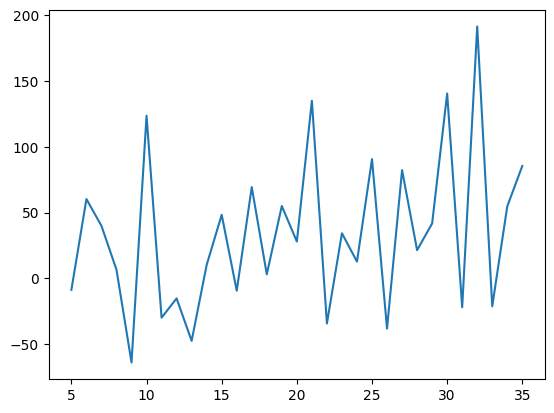

In [65]:
#Removing trend from time series. Substract rolling 6 months average from the data.
rolling_mean = data.rolling(window=6).mean()
data_no_trend = data - rolling_mean#remove trend
data_no_trend.plot()

Check seasonality (visually and using ACF)

<StemContainer object of 3 artists>

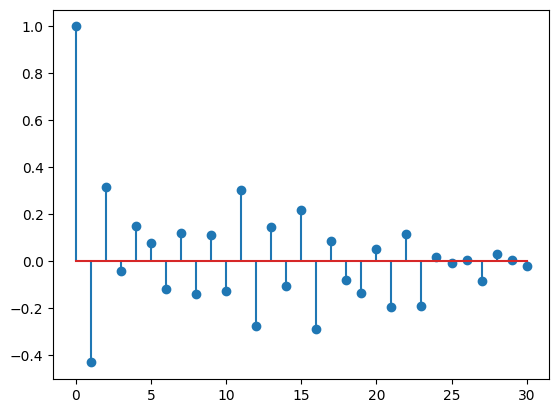

In [67]:
data_no_trend = data_no_trend[data_no_trend.notnull()]
acf = sm.tsa.stattools.acf(data_no_trend,nlags=35)
plot.stem(range(0,len(acf)),acf)

Run automatic ARIMA model determination.

Find the best model, give summary and display the results (existing time range + future)

In [68]:
model = auto_arima(data_no_trend,trace=True)
results = model.fit(data_no_trend)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=366.747, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=343.274, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=364.775, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=338.284, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=337.105, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=335.671, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=337.590, Time=0.06 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=337.506, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=334.129, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=335.225, Time=0.03 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=335.976, Time=0.05 se

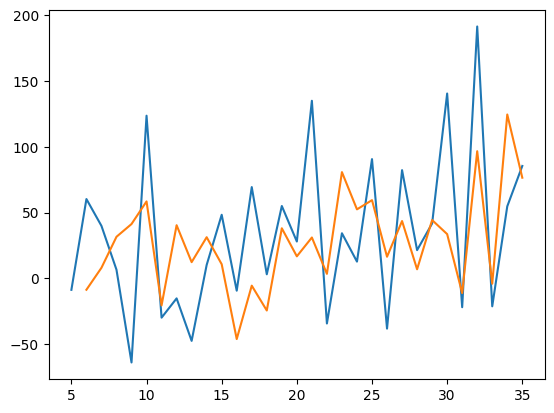

In [69]:
#ARIMA 4,0
plot.plot(data_no_trend)
fitted_vals = results.fittedvalues()
fitted_vals = fitted_vals[1:]
plot.plot(fitted_vals)

In [70]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   31
Model:               SARIMAX(4, 1, 0)   Log Likelihood                -162.064
Date:                Sun, 23 Jul 2023   AIC                            334.129
Time:                        21:04:56   BIC                            341.135
Sample:                             0   HQIC                           336.370
                                 - 31                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3513      0.231     -5.860      0.000      -1.803      -0.899
ar.L2         -1.0836      0.364     -2.978      0.003      -1.797      -0.371
ar.L3         -0.7686      0.368     -2.089      0.037      -1.490      -0.047
ar.L4         -0.3570      0.255     -1.397      0.162      -0.858       0.144
sigma2      2682.8469    805.670      3.330      0.001    1103.762    4261.931
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.92   Prob(JB):                         0.78
Heteroskedasticity (H):               1.22   Skew:                             0.15
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""